In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import scipy.stats as stats
%matplotlib inline

In [6]:
#functions

#Get frequent elements
def get_frequent_elements(df, col_name, num_top_elements):
    return df[col_name].value_counts()[:num_top_elements].sort_index(ascending=True)

#Show plot
def display_plot(df, plot_type, axis, x_col_index, y_col_index):
  x_label = df.columns[x_col_index]
  y_label = df.columns[y_col_index]
  df.plot(ax=axis, kind =plot_type, x=x_label, y=y_label)

#Create fig and axes
def create_sub_plots(rows, cols):
    fig,axes = plt.subplots(rows,cols,figsize=(20,7))
    return fig,axes

#Plot most frequent elements
def plot_frequent_elements(df, plot_type, col_name, num_top_elements, axis):
    frequent = get_frequent_elements(df, col_name, num_top_elements)
    x_label = list(frequent.index)
    y_label = list(frequent.values)

    frequentDf = pd.DataFrame({col_name:x_label, 'Frequency': y_label})
    if (isinstance(axis, int)):
      display_plot(frequentDf,plot_type, axes[axis], 0, 1)
    else:
      display_plot(frequentDf,plot_type, axis,0 ,1)

In [7]:
#Load data
df = pd.read_csv('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/Data/high_tech_data.csv', index_col=0)
df

,Role,Date,Seniority,Salary,Company
0,DevOps,2021-12-30,2,18000,מטריקס
1,DevOps,2021-12-30,0,11500,מטריקס
2,Software Engineer,2021-12-30,2,8500,איירוקס
3,Web Programmer,2021-12-30,1,14500,ידע מערכות בריטניקה
4,Web Programmer,2021-12-30,1,12500,קפיטל לידר
...,...,...,...,...,...
12217,Team Leader,2015-01-04,4,18000,פלאפון
12218,.NET,2015-01-04,4,15000,מורוקאי שמן
12219,Team Leader,2015-01-04,4,28000,אסטיאה
12220,C# Programmer,2015-01-04,4,18000,אינטל


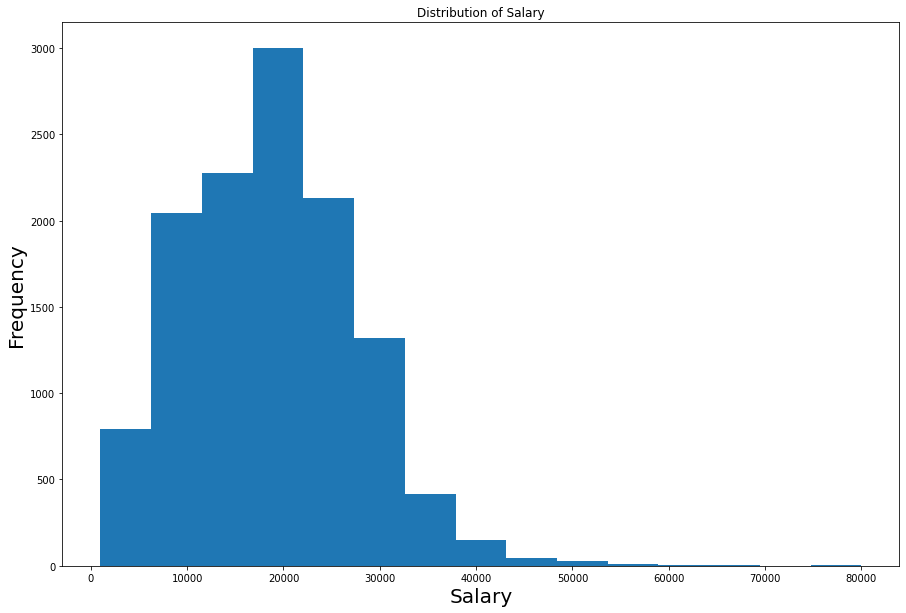

In [8]:

#Distribution of wages in high-tech
plt.figure(figsize=(15,10))
plt.hist(df.Salary, bins=15, histtype="stepfilled") 
plt.xlabel("Salary", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.title("Distribution of Salary")
plt.show()


**Here we see the distribution of wages according to the frequency of occurrence, we see a resemblance to the normal distribution as we expected**

Text(0, 0.5, 'Role')

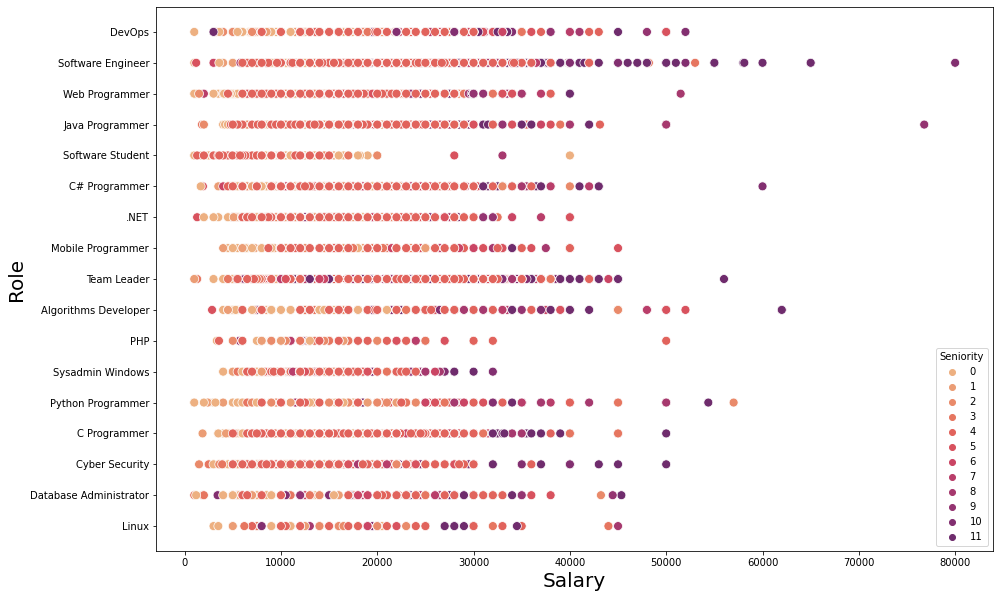

In [9]:
#Update figure size
plt.figure(figsize=(15,10))

#Salary table by position and seniority
sns.scatterplot(data = df, x = "Salary", y = "Role", hue = "Seniority", s=80, hue_norm=(0, 13), legend='full', palette='flare')

plt.xlabel("Salary", fontsize = 20)
plt.ylabel("Role", fontsize = 20)

**You can see the salary distribution for each position, with adjustment to seniority by color, we see that positions like Software Engineer and Algorithm developer on the most profitable side of the scale, and in addition you can see that as the years of experience increase, the salary increases accordingly, as expected**

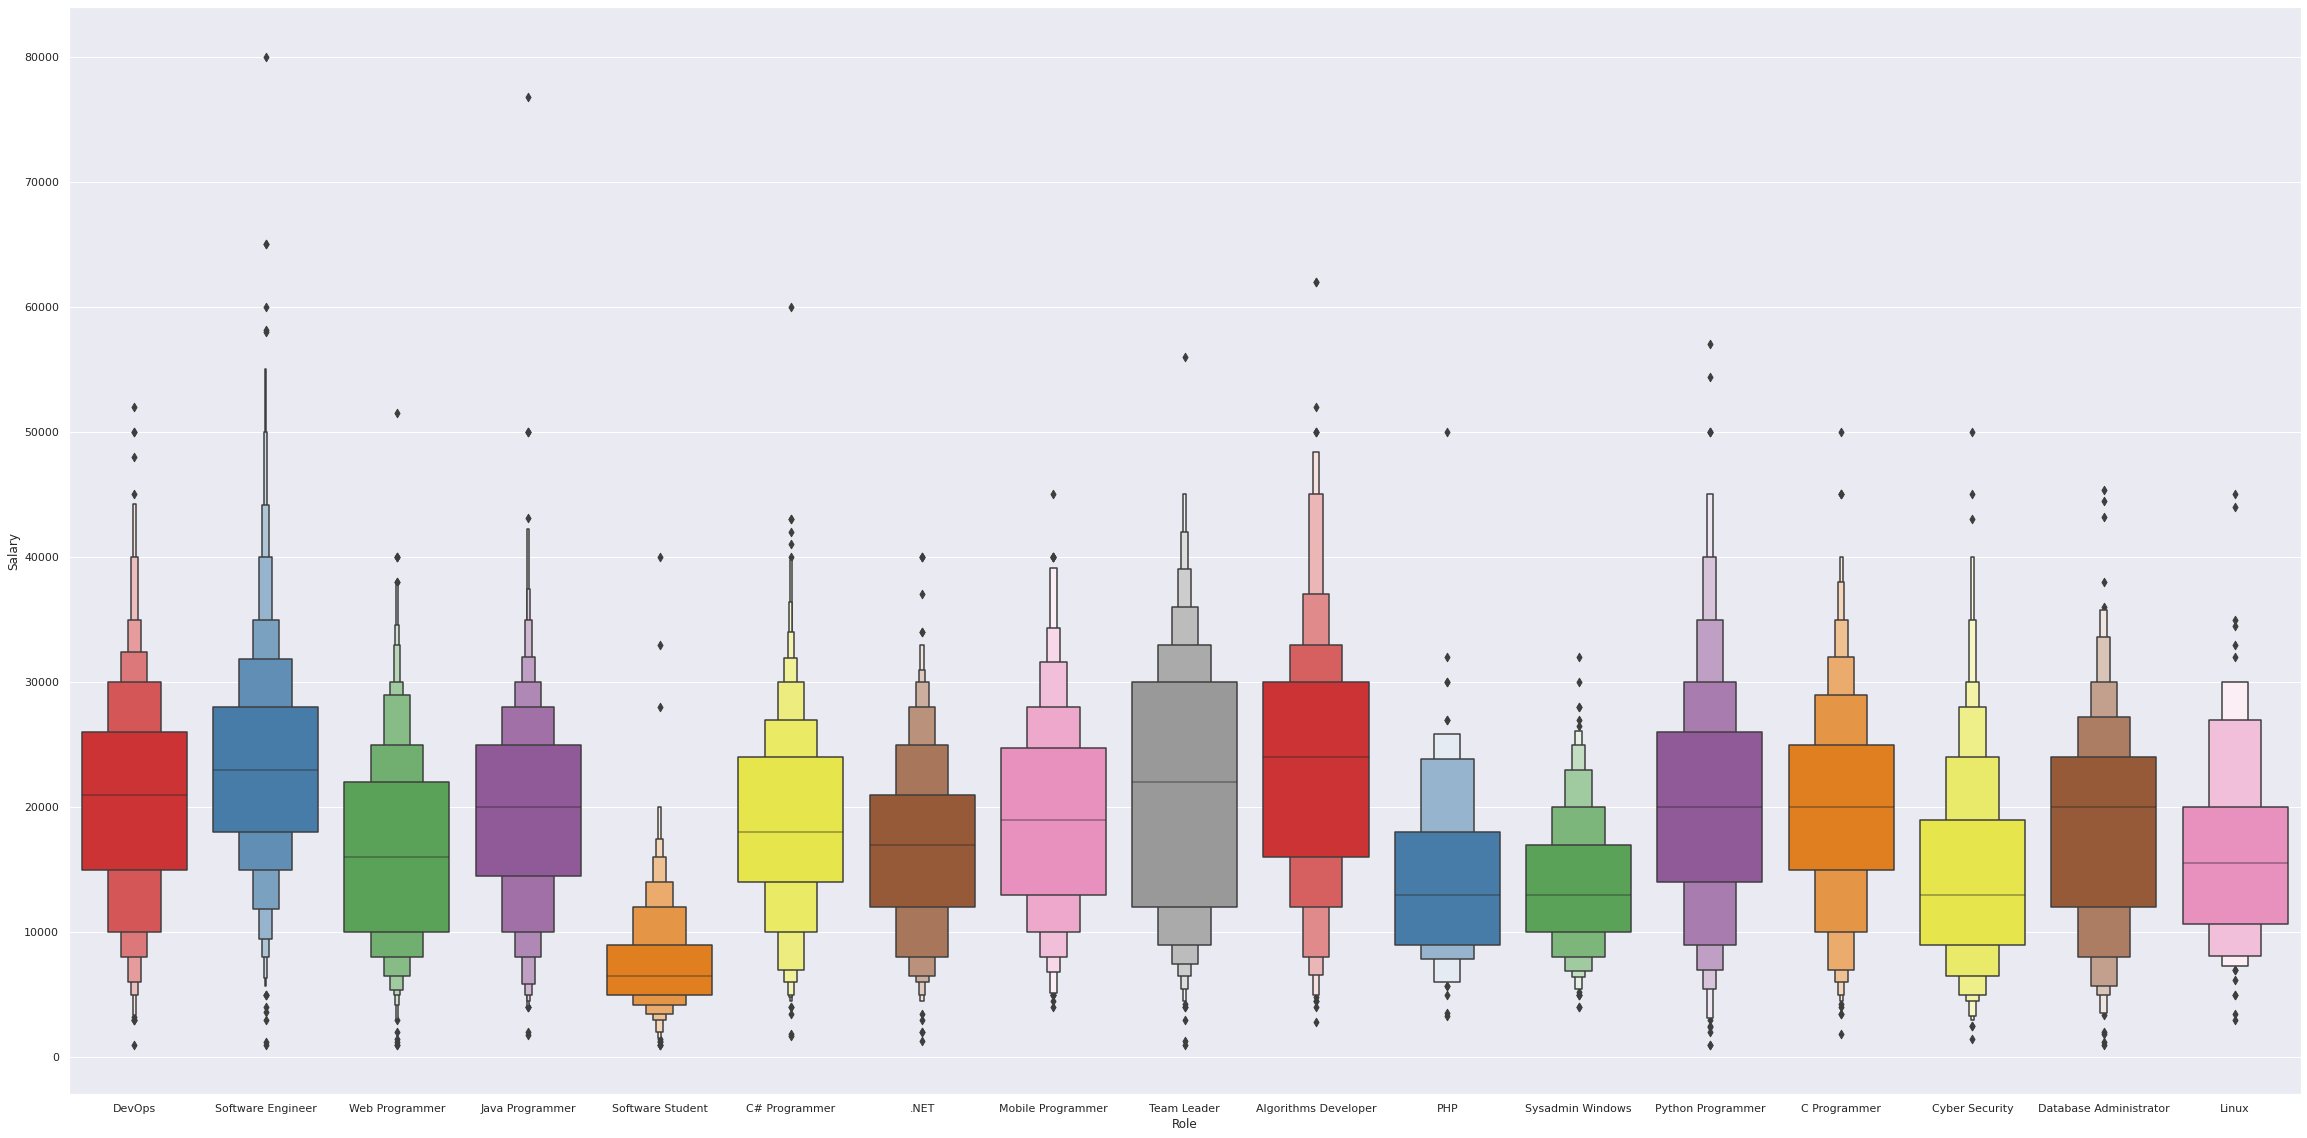

In [10]:
#Update figure size
plt.figure(figsize=(40,20))

#Update figure font
sns.set(font_scale=1)

#Additional presentation of salary by position
sns.boxenplot(x="Role", y="Salary",
                 data=df, palette="Set1")

**You can see another presentation of the salary distribution versus role, here you can clearly see the outliers, you can see that the wider the box, the more people are on the salary scale for the role shown in the plot.**

Text(0, 0.5, 'Seniority')

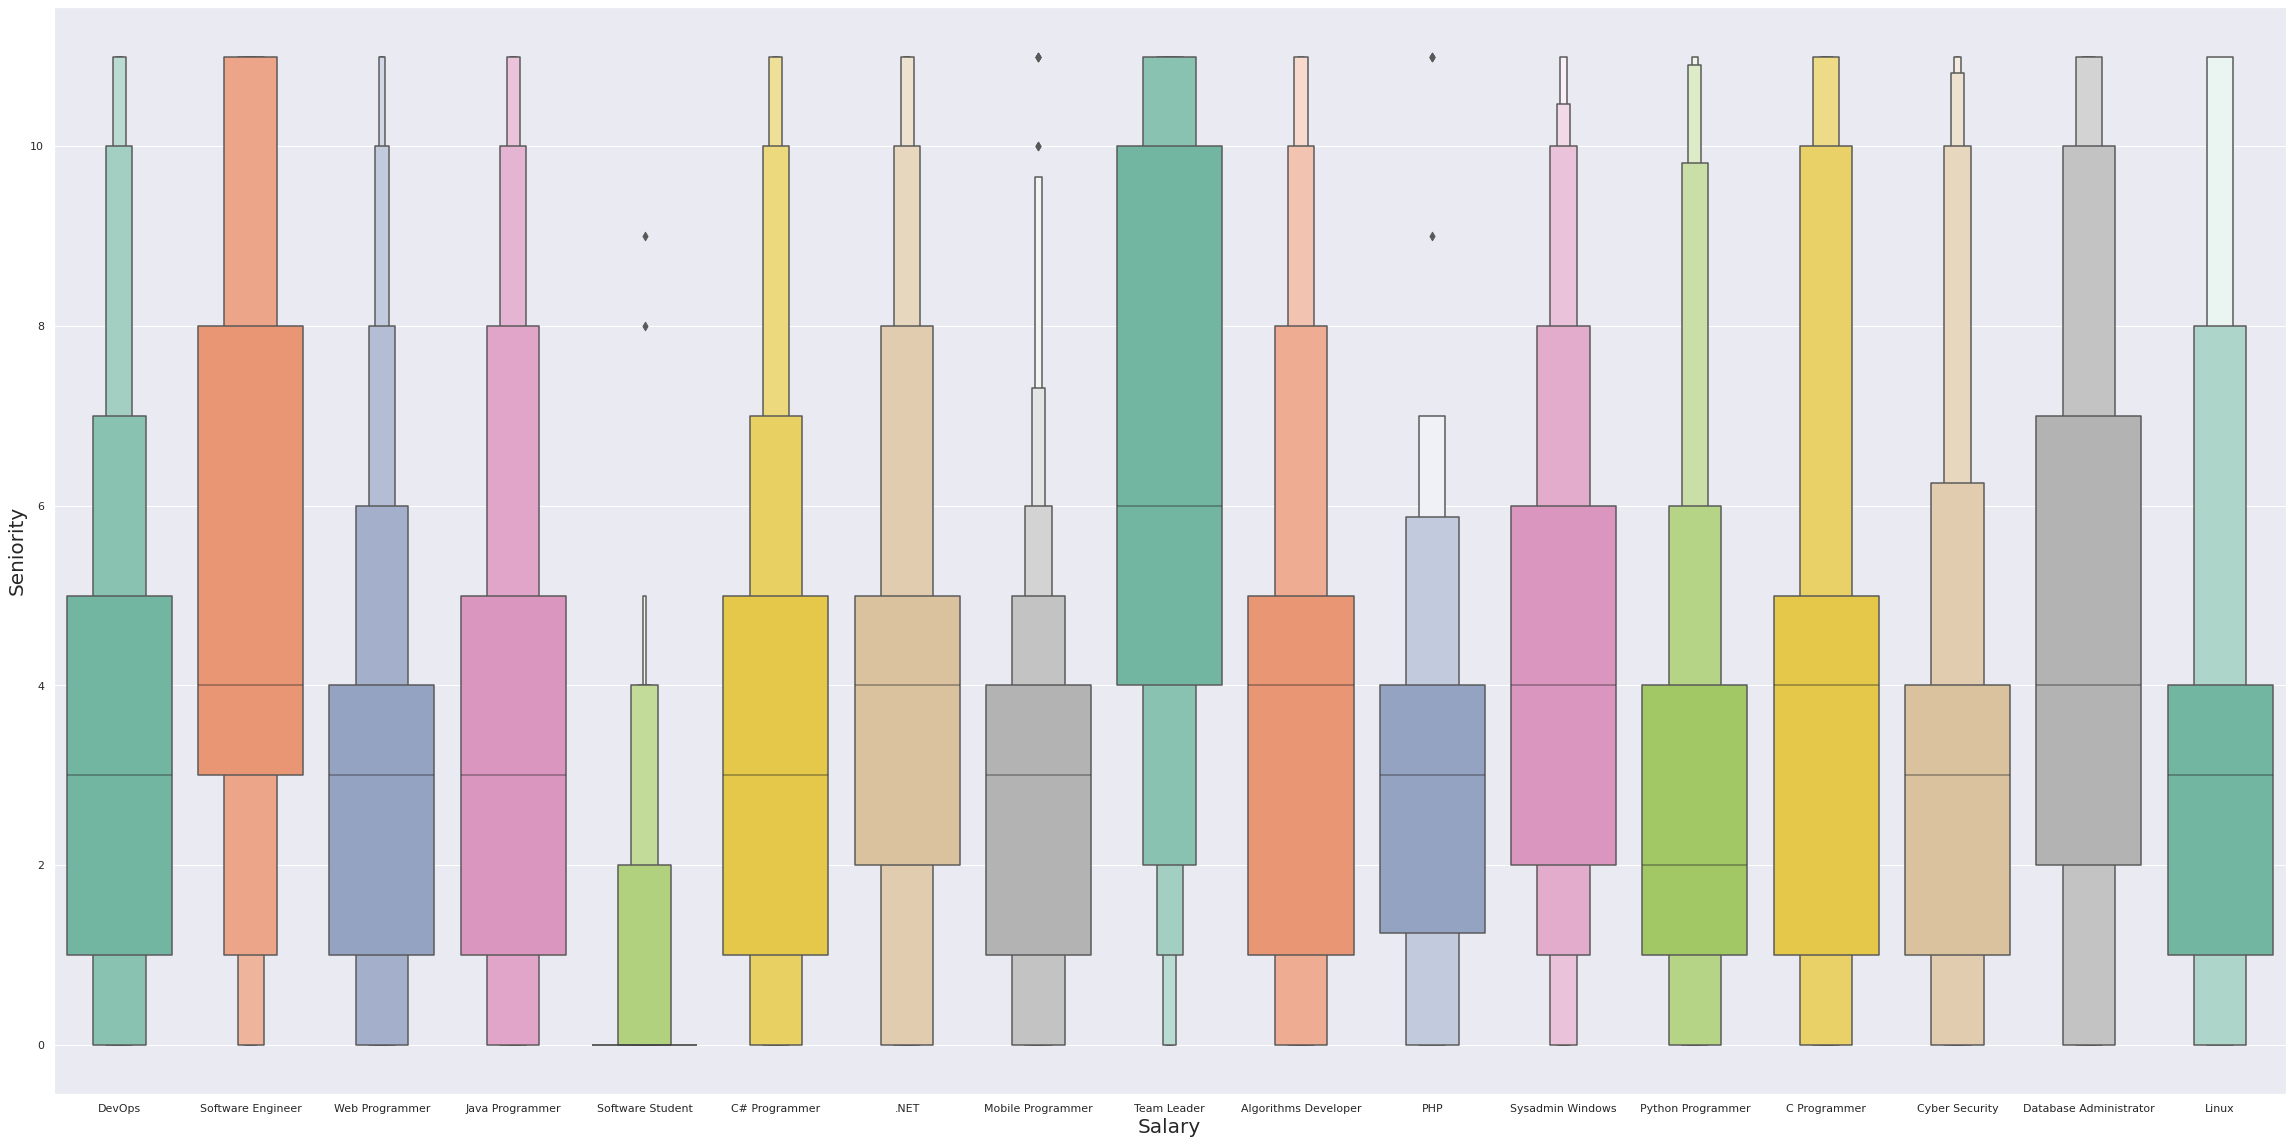

In [11]:
#Update figure size
plt.figure(figsize=(40,20))

#Update figure font
sns.set(font_scale=1)

#A table showing the distribution of seniority by position
sns.boxenplot(x="Role", y="Seniority",
                 data=df, palette="Set2")


plt.xlabel("Salary", fontsize = 20)
plt.ylabel("Seniority", fontsize = 20)

**You can see in the plot the seniority of an employee according to positions in high-tech, let's look at the role of Team Leader, the common seniority is between 4 years and 10 years, as expected from a director position.**

Text(0, 0.5, 'Salary')

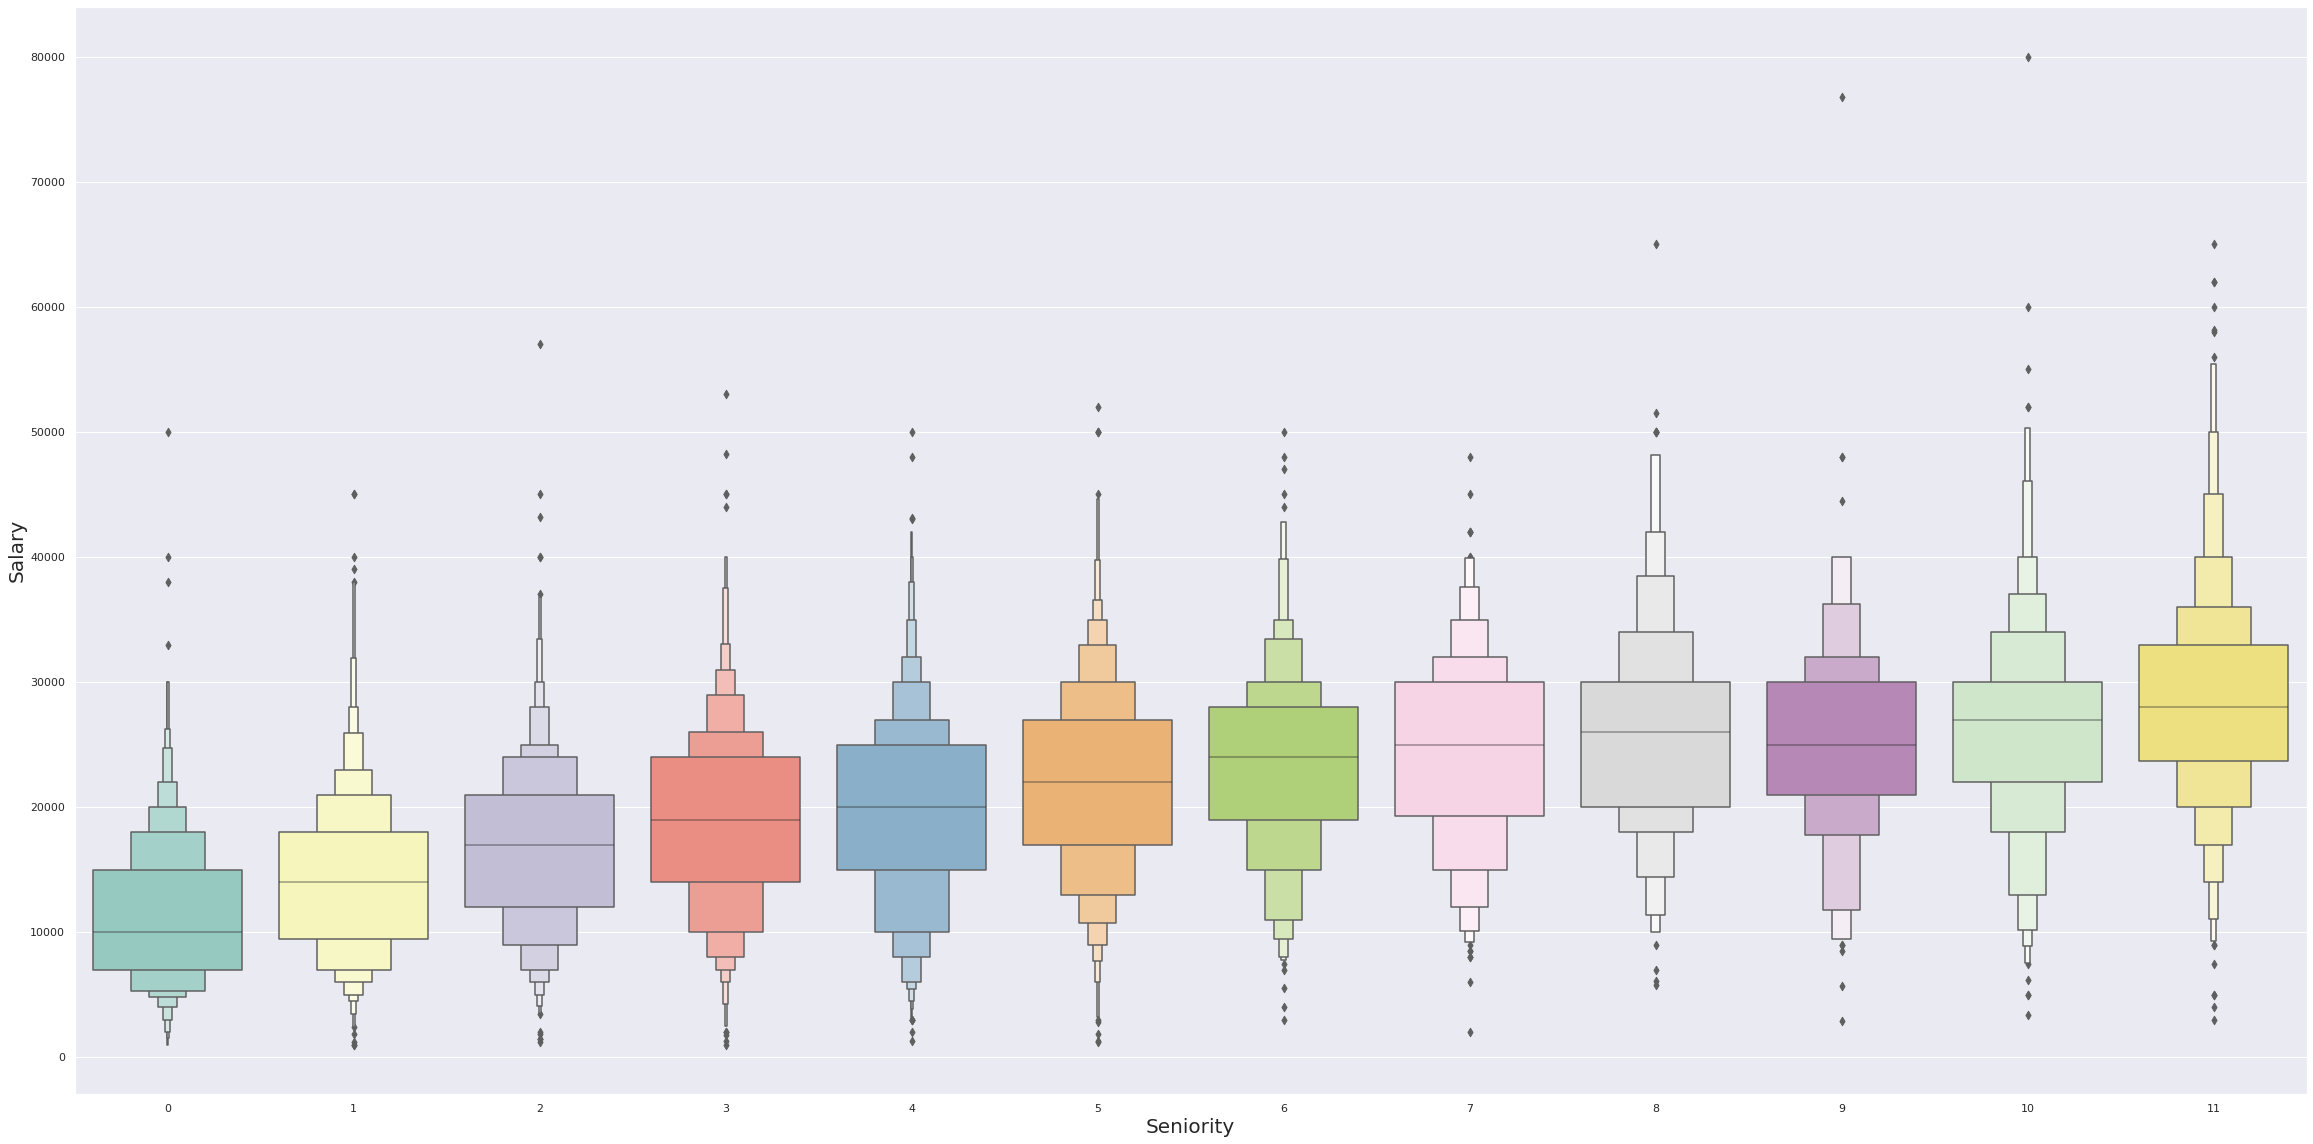

In [12]:
#A table showing experience versus salary
plt.figure(figsize=(40,20))
sns.set(font_scale=1)
sns.boxenplot(x="Seniority", y="Salary",
                 data=df, palette="Set3")


plt.xlabel("Seniority", fontsize = 20)
plt.ylabel("Salary", fontsize = 20)

**This graph shows the salaries of employees versus years of experience.
We can clearly see a linear increase - the more years of experience an employee has, the higher the salary accordingly as expected.**

In [13]:
#The most common companies in Data
freq_companies = list(df['Company'].value_counts()[:20].index)
companies_df = pd.DataFrame({'Role' : [], 'Date': [], 'Seniority' : [], 'Salary': [], 'Company': []})

#Insert to DataFrame
for company in freq_companies:
  companies_df = companies_df.append(df[df['Company'] == company])

#Convert company name to hebrew
company_names = {'אינטל': 'Intel',
                 'אמדוקס':'Amdocs',
                 "צ'קפוינט":'CheckPoint',
                 'מטריקס':'Matrix',
                 'מערכות אלביט':"Elbit System",
                 'צה"ל': 'IDF',
                 'מיקרוסופט': 'Microsoft',
                 'נייס':'NICE',
                 'רפאל':'Rafael',
                 'נס':'Ness',
                 'HPE מרקורי': 'HP',
                 'ורינט': 'Verint',
                 'סינטקמדיה':'SintecMedia',
                 'מלאנוקס':'Mellanox',
                 'אווירית תעשייה':'IAI',
                 'יבמ': 'IBM',
                 'סיסקו':'Cisco',
                 'גוגל':'Google',
                 'מלם-תים':'Malam-Team',
                 'גלובל מטריקס':'Global Matrix'
                 }

for key,value in company_names.items():
  companies_df.Company = companies_df.Company.replace(key,value)

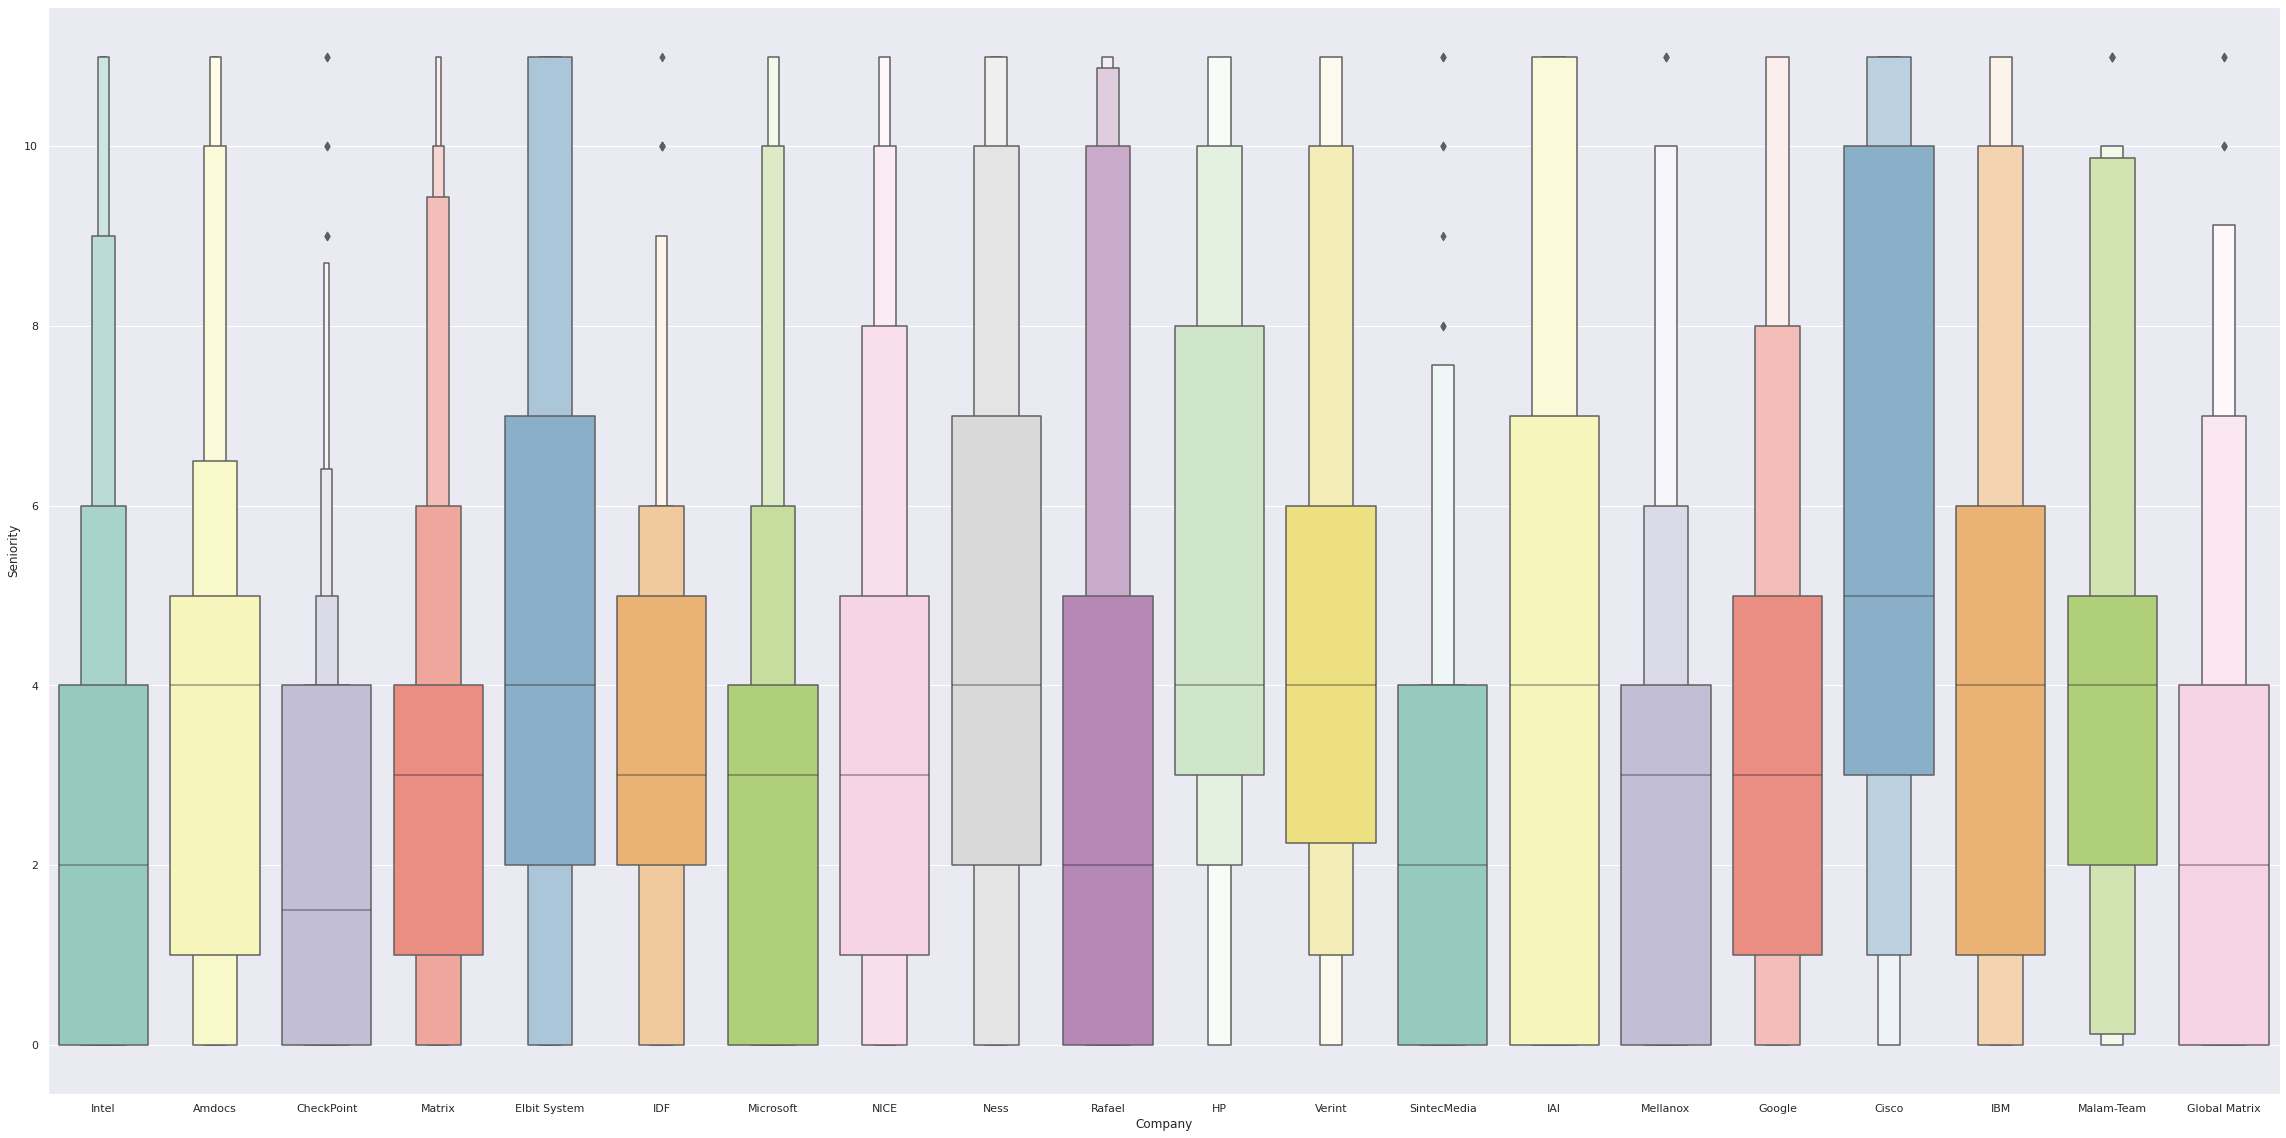

In [14]:
#A table showing the seniority at work in the most common companies in the data
plt.figure(figsize=(40,20))
sns.boxenplot(x="Company", y="Seniority",
                 data=companies_df, palette="Set3")

**This graph shows years of experience versus the companys' name, contrary to popular belief that it is harder to be accepted to larger companies, we see that a significant proportion of the larger companies tend to accept young and inexperienced employees, and give opportunities to potential employees of all ages.**

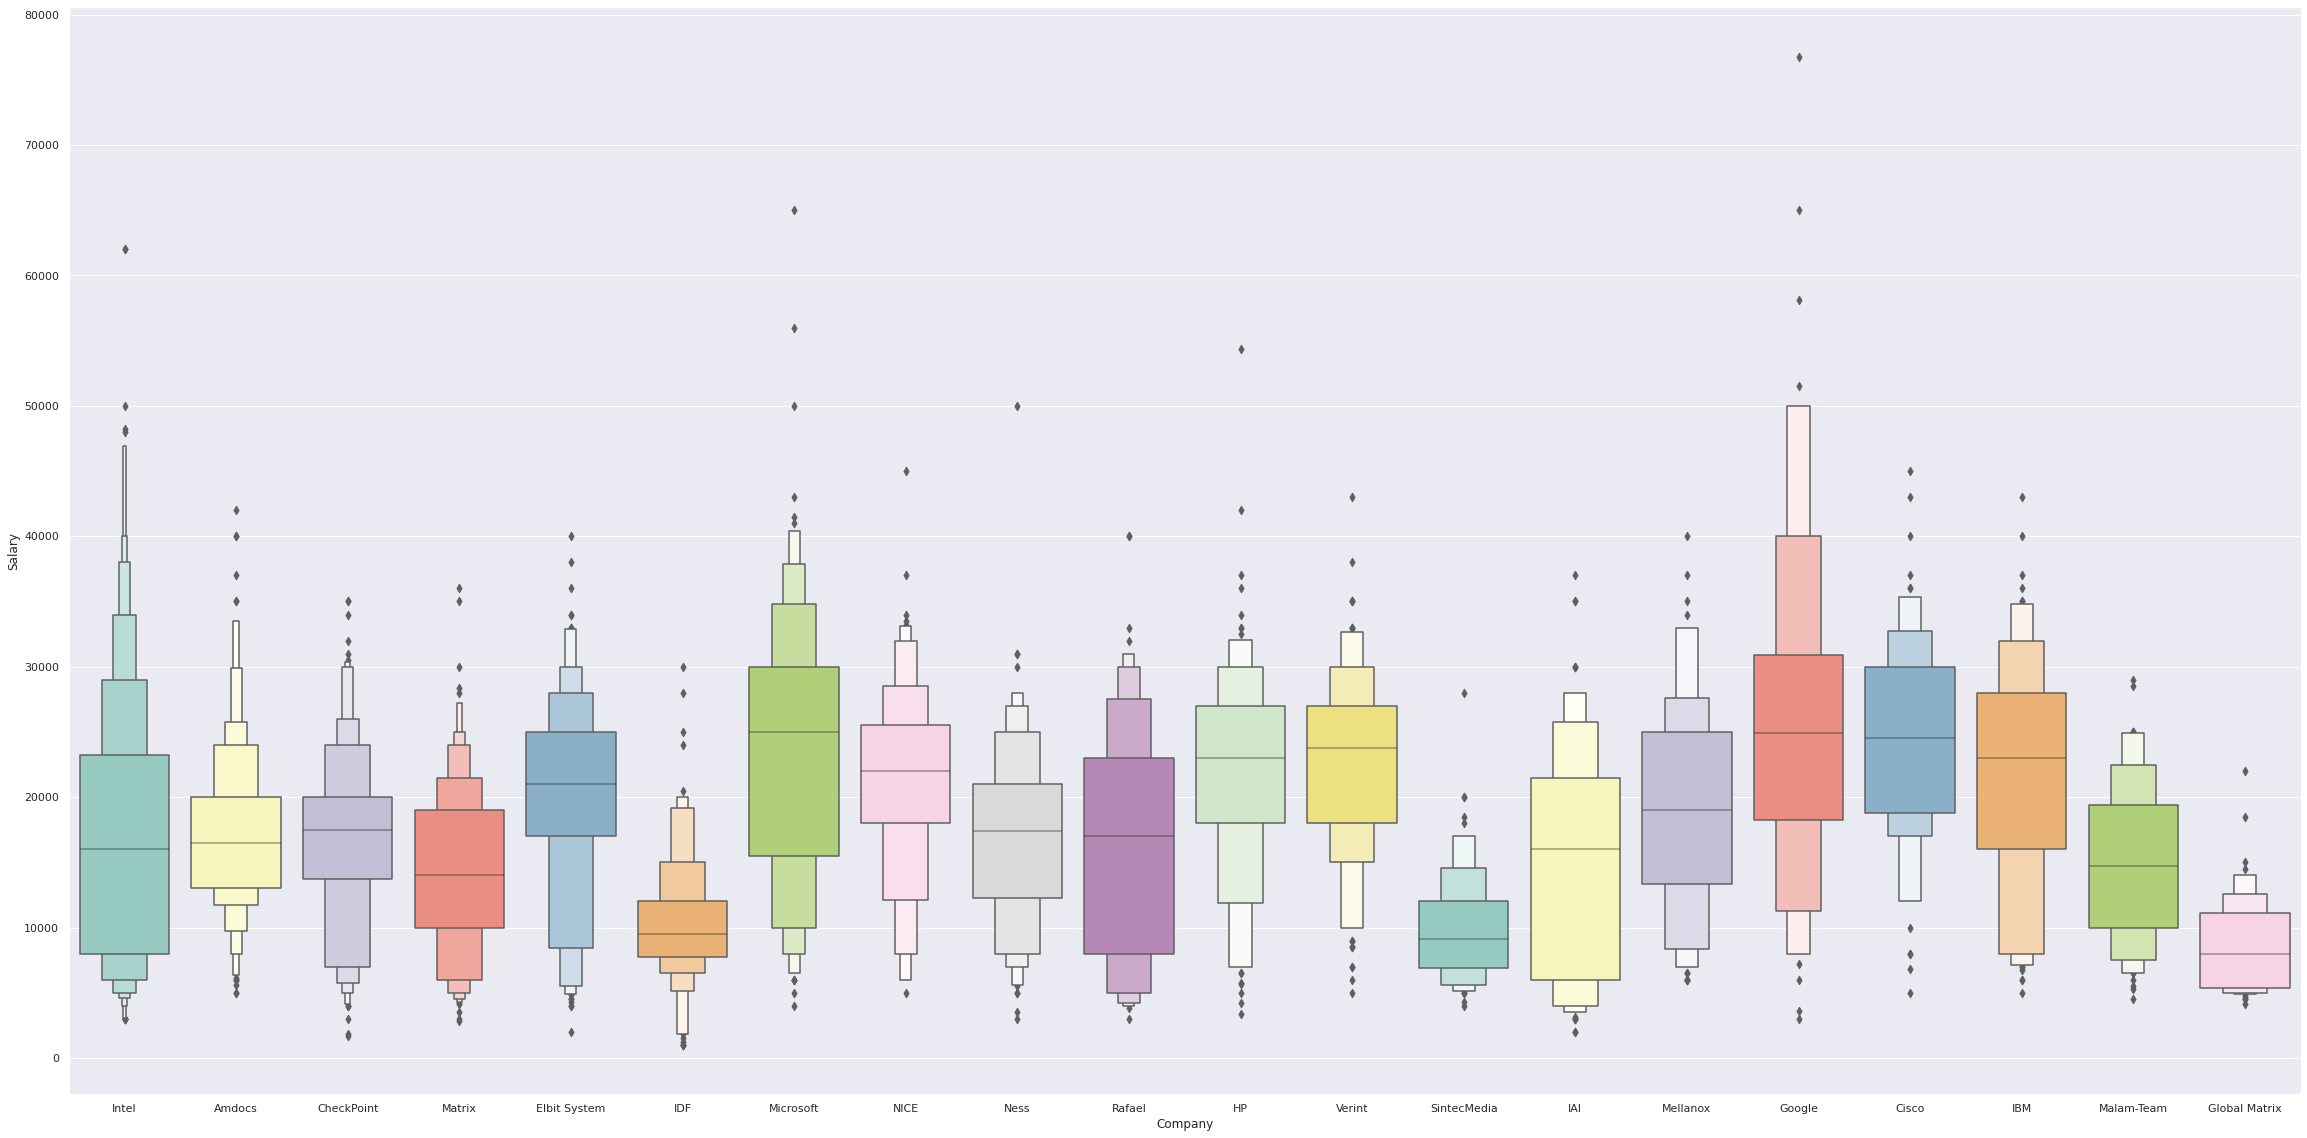

In [15]:
#A table showing the wages at work in the most common companies in the data
plt.figure(figsize=(40,20))
sns.boxenplot(x="Company", y="Salary",
                 data=companies_df, palette="Set3")

**Given the most common companies in the data, we can see the difference in the average salaries between the companies, it can be seen for example that in the IDF the average salaries are significantly lower than in industry**

In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Create dict of years shown in the table
salaries = {'2015': [], '2016': [], '2017': [], '2018': [], '2019':[],'2020':[],'2021':[]}

#Separation by years
for year in range(2015,2022):
  curr_year_df = df[df['Date'].dt.year == year]
  salaries_curr_year = curr_year_df['Salary']
  salaries_curr_year.reset_index(drop=True, inplace=True)
  salaries[str(year)] = salaries_curr_year
  
#Create DataFrame
salaries_df = pd.DataFrame(salaries)

#Filling in missing values ​​in each of the years using the median
for year in range (2015,2022):
  salaries_df[str(year)].fillna(salaries_df[str(year)].median(),inplace=True)


salaries_df




,2015,2016,2017,2018,2019,2020,2021
0,29000.0,15000.0,6500,24941.0,14500.0,20000.0,18000.0
1,14000.0,15000.0,24000,15000.0,26000.0,20000.0,11500.0
2,7000.0,16000.0,8500,20000.0,29000.0,9500.0,8500.0
3,26000.0,50000.0,18000,8000.0,32000.0,28000.0,14500.0
4,25000.0,27000.0,4800,8000.0,6200.0,6840.0,12500.0
...,...,...,...,...,...,...,...
2105,18000.0,18000.0,6000,18000.0,18000.0,19000.0,19000.0
2106,18000.0,18000.0,16000,18000.0,18000.0,19000.0,19000.0
2107,18000.0,18000.0,19000,18000.0,18000.0,19000.0,19000.0
2108,18000.0,18000.0,18000,18000.0,18000.0,19000.0,19000.0


Text(0, 0.5, 'Salary')

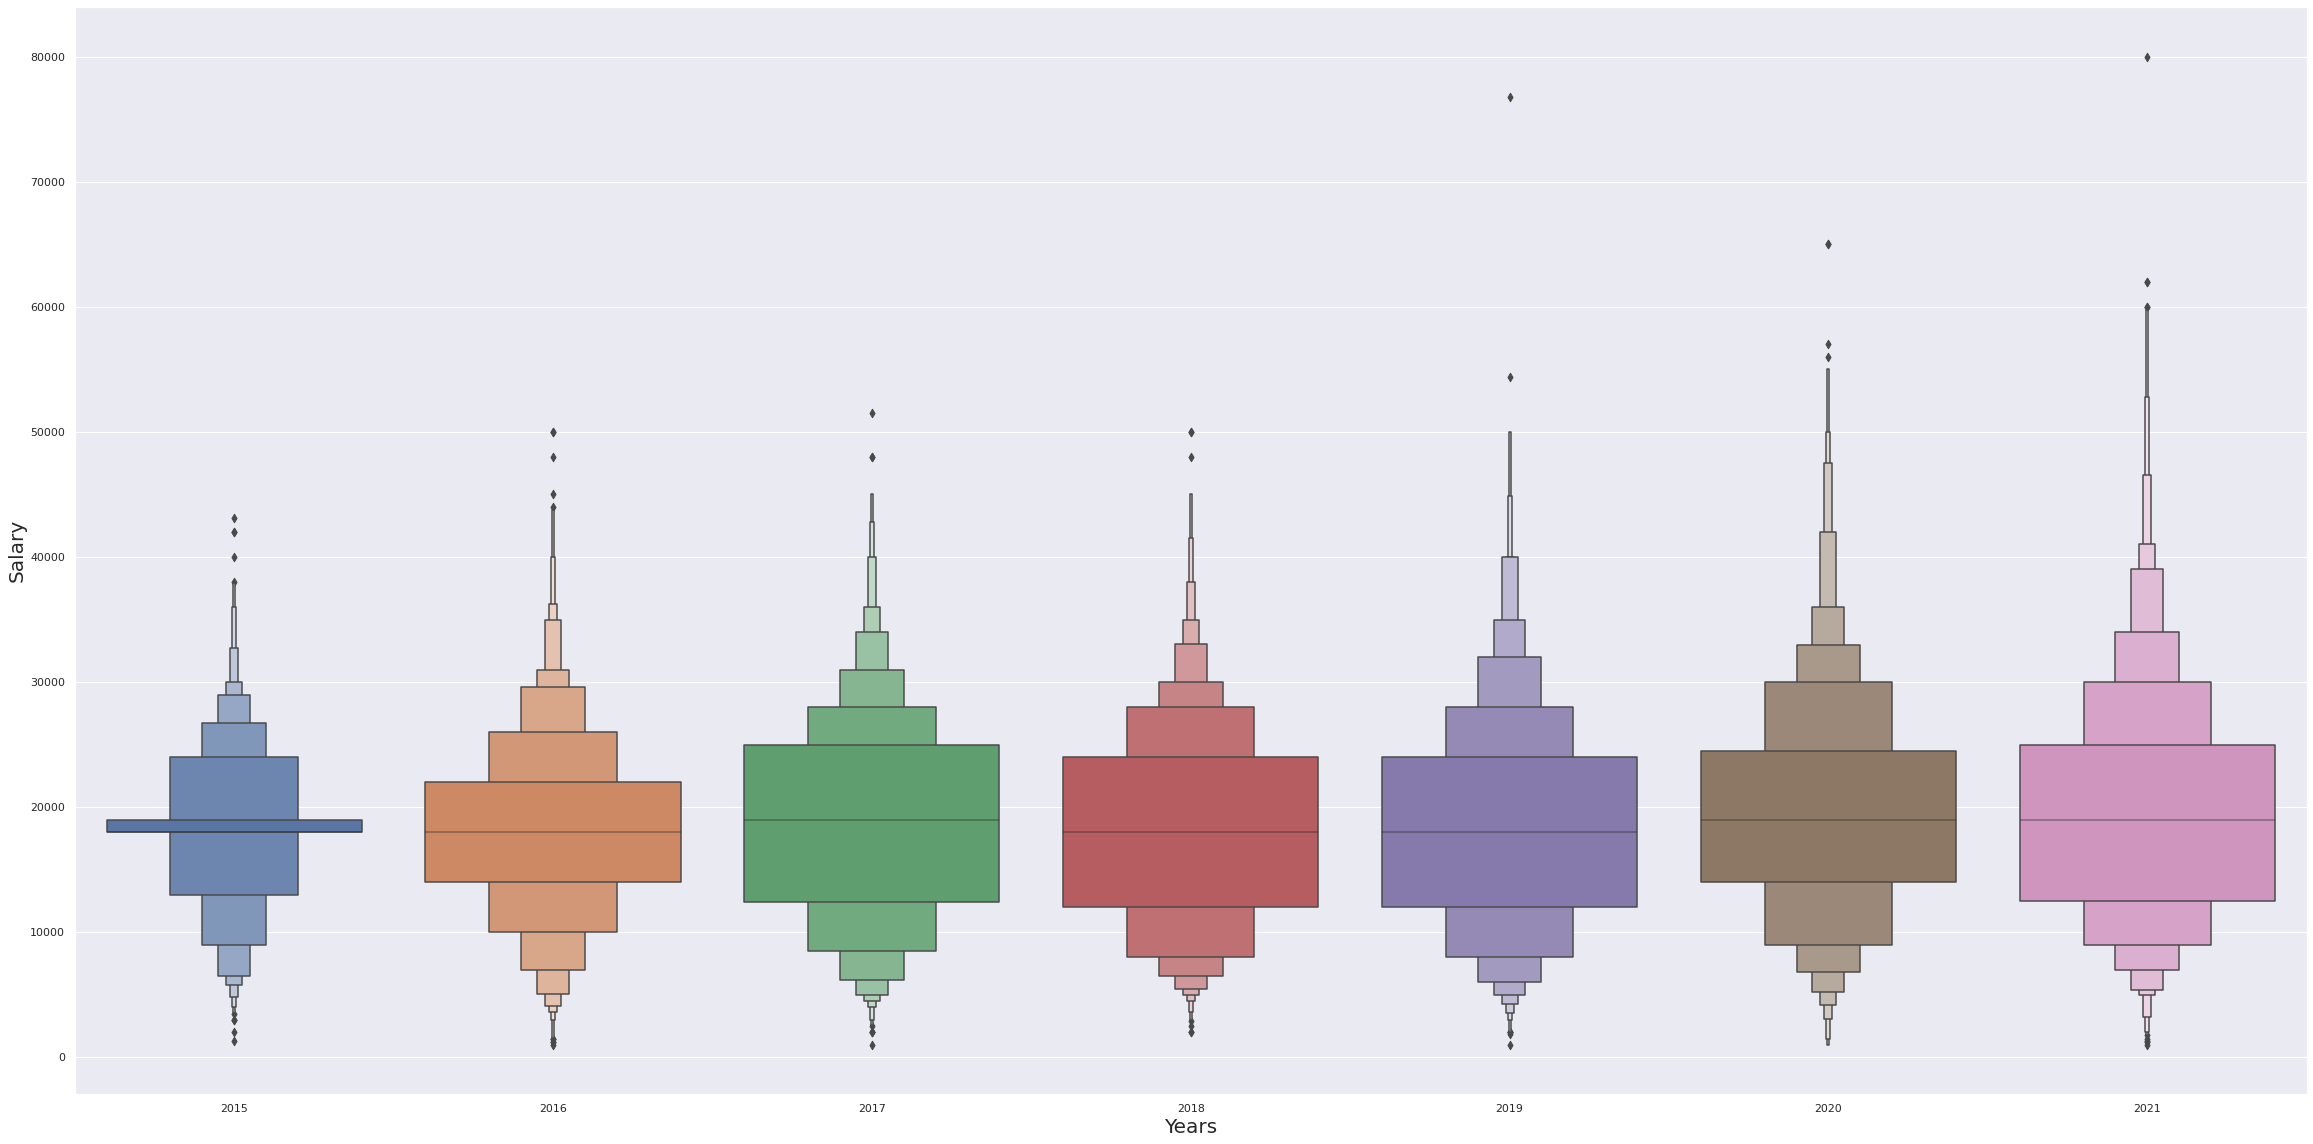

In [17]:
#Table of wages versus years in high-tech
plt.figure(figsize=(40,20))
sns.boxenplot(data=salaries_df)
plt.xlabel("Years", fontsize = 20)
plt.ylabel("Salary", fontsize = 20)

**In this graph we can find information regarding salaries compared to the years 2015-2021.
We can see that the distributions are quite similar over the years.
There is a slight change in salaries in 2020. The presumed cause is the Coronavirus.
In contrary, we see that the salary range was balanced in 2021 and was more similar to the information we saw in previous years.**